**Аналитика крупного интернет-магазина и вывдвижение гипотез**

Контекст

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 


задачи 

- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.


Проанализируйте A/B-тест:

- Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
- Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
- Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
- Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
- Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
- Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
- Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.


Примите решение по результатам теста и объясните его. Варианты решений:

1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.


Описание данных
Данные для первой части
Файл /datasets/hypothesis.csv. Скачать датасет
Hypothesis — краткое описание гипотезы;
Reach — охват пользователей по 10-балльной шкале;
Impact — влияние на пользователей по 10-балльной шкале;
Confidence — уверенность в гипотезе по 10-балльной шкале;
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
Данные для второй части
Файл /datasets/orders.csv. Скачать датасет
transactionId — идентификатор заказа;
visitorId — идентификатор пользователя, совершившего заказ;
date — дата, когда был совершён заказ;
revenue — выручка заказа;
group — группа A/B-теста, в которую попал заказ.
Файл /datasets/visitors.csv. Скачать датасет
date — дата;
group — группа A/B-теста;
visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
#импорт библиотек 
import pandas as pd
from collections import Counter
from datetime import datetime, timedelta
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from pymystem3 import Mystem
import seaborn as sns
from scipy import stats as st
from scipy import stats
from IPython.display import display, Markdown
%matplotlib inline
import matplotlib.dates as mdates
import math
import numpy as np
import pandas as pd
from scipy import stats as st



In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

функция вывода датасетов для 2 части заданяи 

In [3]:
def display_first_10_rows():
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

    print("\nПервые 10 строк датасета orders:")
    print(orders.head(10))

    print("\nПервые 10 строк датасета visitors:")
    print(visitors.head(10))

функция для предварительного анализа данных и вывода общей информации 

In [4]:

def display_information(table, table_name):
    print(f"--- {table_name} ---")
    
    display(Markdown("Первые 5 строк:"))
    display(table.head(5))
    
    display(Markdown("Типы данных:"))
    display(table.dtypes.to_frame().T.rename({0: 'dtypes'}, axis='index'))
    
    display(Markdown("Количество пропущенных значений:"))
    display(table.isna().sum().to_frame().T.rename({0: 'missing_values'}, axis='index'))
    
    display(Markdown("Количество дубликатов:"))
    display(pd.DataFrame(data={'duplicates': [table.duplicated().sum()]}))
    
    print("\n---\n")

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

table_names = [
    ("гипотезы", hypothesis),
    ("заказы", orders),
    ("посетители", visitors)
]

for table_name, table in table_names:
    display_information(table, table_name)


--- гипотезы ---


Первые 5 строк:

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


Типы данных:

,Hypothesis,Reach,Impact,Confidence,Efforts
dtypes,object,int64,int64,int64,int64


Количество пропущенных значений:

,Hypothesis,Reach,Impact,Confidence,Efforts
missing_values,0,0,0,0,0


Количество дубликатов:

,duplicates
0,0



---

--- заказы ---


Первые 5 строк:

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Типы данных:

,transactionId,visitorId,date,revenue,group
dtypes,int64,int64,object,int64,object


Количество пропущенных значений:

,transactionId,visitorId,date,revenue,group
missing_values,0,0,0,0,0


Количество дубликатов:

,duplicates
0,0



---

--- посетители ---


Первые 5 строк:

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Типы данных:

,date,group,visitors
dtypes,object,object,int64


Количество пропущенных значений:

,date,group,visitors
missing_values,0,0,0


Количество дубликатов:

,duplicates
0,0



---



In [5]:
hypothesis.columns = map(str.lower, hypothesis.columns)


In [6]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [7]:
# преобразование данных о времени
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [8]:
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']


приводим названия к нижниму регистру 

In [9]:
orders.columns


Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [10]:
hypothesis.columns.to_list()

['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [11]:

# Расчет количества групп в АВ-тесте
num_groups = len(orders['group'].unique())
print(f"Количество групп в АВ-тесте: {num_groups}")
print('***********************************************')

# Расчет дат начала и окончания теста
test_start = orders['date'].min()
test_end = orders['date'].max()
print(f"Дата начала теста: {test_start}")
print('***********************************************')

print(f"Дата окончания теста: {test_end}")
print('***********************************************')

# Расчет количества пользователей в каждой группе
users_per_group = orders.groupby('group')['visitor_id'].nunique()
print(f"Количество пользователей в каждой группе: \n{users_per_group}")
print('***********************************************')


# Расчет вероятности попадания пользователей в обе группы
orders_summary = orders.groupby('visitor_id').agg({'group': 'nunique'})
users_in_both_groups = orders_summary[orders_summary['group'] == 2]
probability_of_both_groups = len(users_in_both_groups) / len(orders_summary)
print(f"Вероятность попадания пользователей в обе группы: {probability_of_both_groups}")


Количество групп в АВ-тесте: 2
***********************************************
Дата начала теста: 2019-08-01 00:00:00
***********************************************
Дата окончания теста: 2019-08-31 00:00:00
***********************************************
Количество пользователей в каждой группе: 
group
A    503
B    586
Name: visitor_id, dtype: int64
***********************************************
Вероятность попадания пользователей в обе группы: 0.05625606207565471


Примените фреймворк ICE и  RICE 


In [38]:
pd.options.display.max_colwidth = 150
# Посчитаем ICE для гипотез
hypothesis['ICE'] = ( hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).round(2)


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [13]:
# Посчитаем RICE для гипотез
hypothesis['RICE'] = (hypothesis['reach'] *  hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).round(2)


,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [14]:
display(hypothesis
)


,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


**Вывод**

в топах обоих таблиц находятся теории под номерами 7 2 0 6. Но всё же списки разные. Так произошло, потому что формулы разные, одна учитывает охват, а другая — нет.

отличия ICE и RICE

ICE (влияние, уверенность, усилия)
RICE (влияние, уверенность, усилия, охват)

В отличие от ICE, критерий охват учитывает количество пользователей или клиентов, которых затронет экспиримент. Это позволяет учитывать масштабность проекта и понимать его влияние на более широкую аудиторию.

рекомендую отдать приоритет тестированию гипотез:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей


Анализ A/B-теста

In [15]:
display_first_10_rows()


Первые 10 строк датасета orders:
   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
5      182168103   935554773  2019-08-15     2210     B
6      398296753  2900797465  2019-08-15     1860     B
7     2626614568    78758296  2019-08-15     1044     A
8     1576988021   295230930  2019-08-15    13710     A
9     1506739906  1882260405  2019-08-15     1855     B

Первые 10 строк датасета visitors:
         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756
5  2019-08-06     A       667
6  2019-08-07     A       644
7  2019-08-08     A       610
8  2019-08-09     A       617
9  2019-08-10 

In [16]:
#Проверим, есть ли пользователи, которые попали в обе группы
duplicates_users = np.intersect1d(orders.query('group == "A"')['visitor_id'].unique(), orders.query('group == "B"')['visitor_id'].unique())
duplicates_users

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [17]:
#удаляем
orders = orders[~orders['visitor_id'].isin(duplicates_users)]


пользователей которые попали в обегруппы не так много, можно удалить их из списка 


In [18]:
#Создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

#Получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transaction_id' : pd.Series.nunique, 
                                          'visitor_id' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

#Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

#Объединим кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

#Переименуем столбцы
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


**1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.**

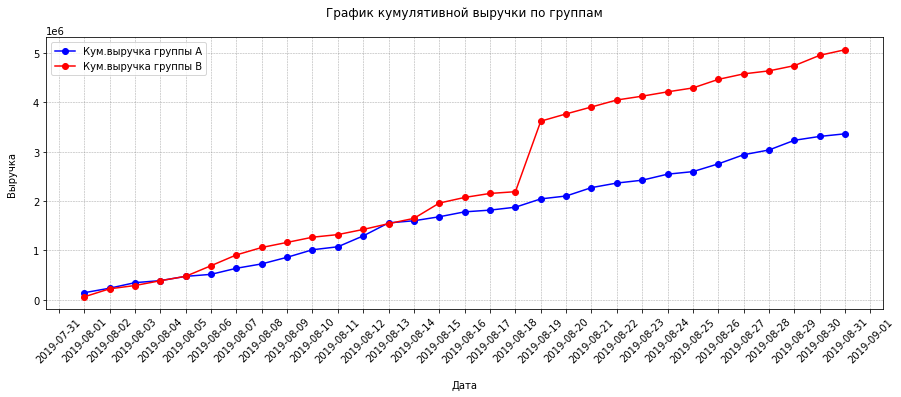

In [19]:


cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(15,5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Кум.выручка группы A', color='blue', linestyle='-', marker='o')

#Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Кум.выручка группы B', color='red', linestyle='-', marker='o')

# Настраиваем ось X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=45)

plt.title('График кумулятивной выручки по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Выручка\n')

plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper left')

plt.show()


Наблюдается резкий скачек в графике у группы В, возможно имеют место аномально большое количество заказов или аномально высокий средний чек. дата скочка 19.08.2018

**2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.**

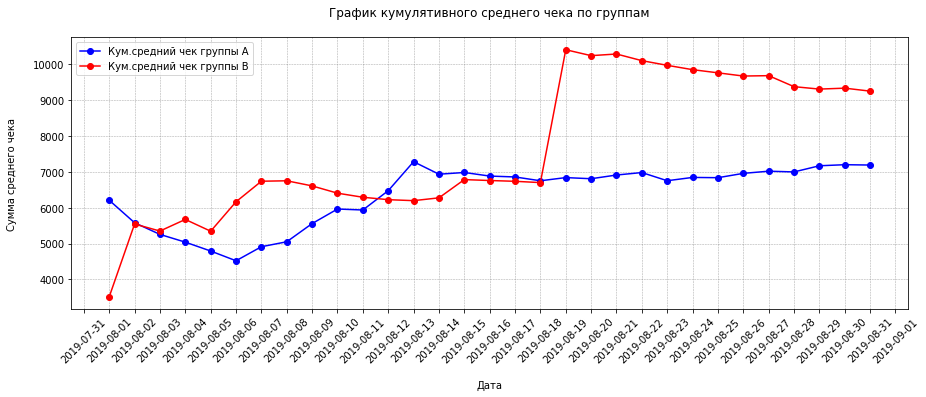

In [20]:
plt.figure(figsize=(15,5))

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Кум.средний чек группы A', color='blue', linestyle='-', marker='o')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Кум.средний чек группы B', color='red', linestyle='-', marker='o')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=45)

plt.title('График кумулятивного среднего чека по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Сумма среднего чека\n')

plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper left')

plt.show()


в данных имеются выбросы 

**3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.**

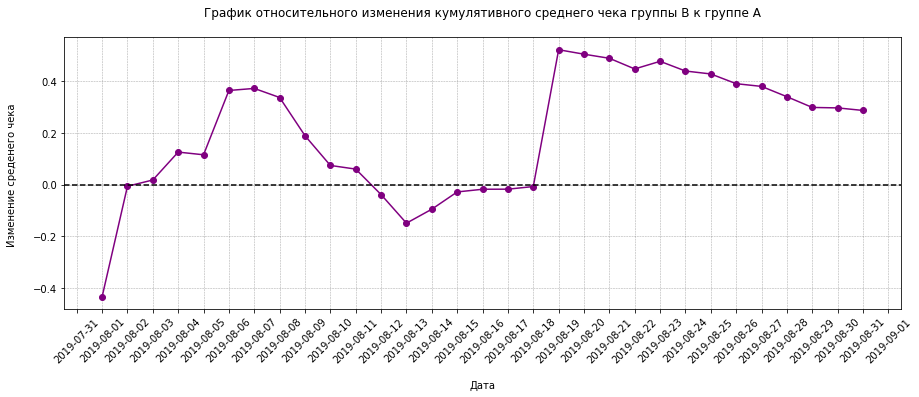

In [21]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,5))

# Строим график относительного изменения кумулятивного среднего чека группы B к группе A
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, color='purple', linestyle='-', marker='o')

# Настраиваем ось X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=45)

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A\n  ')
plt.xlabel('\nДата')
plt.ylabel('Изменение среденего чека \n')

plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.show()

график не ровный, скорее всего в эти даты были совершенны заказы на большую сумму

**4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.**

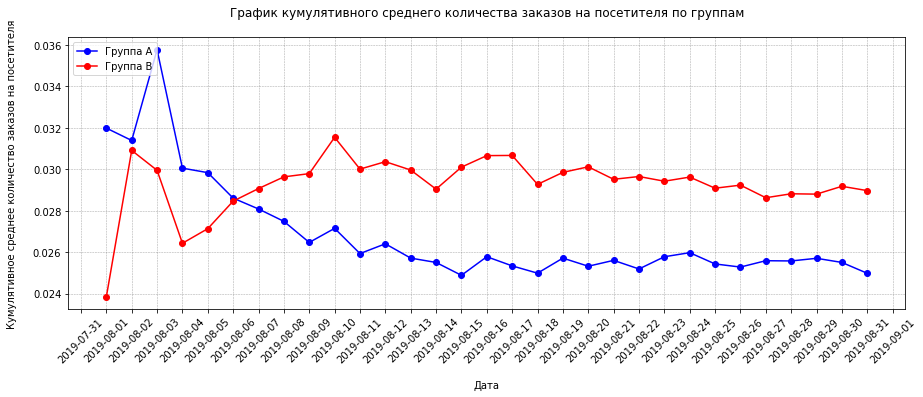

In [22]:

# Рассчитываем кумулятивное среднее количество заказов на посетителя для каждой группы
cumulativeData['avg_orders_per_visitor'] = cumulativeData['orders'] / cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

# Регистрируем конвертеры для matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Создаем фигуру для графика
plt.figure(figsize=(15, 5))

# Строим график кумулятивного среднего количества заказов на посетителя для группы A
plt.plot(cumulativeDataA['date'], cumulativeDataA['avg_orders_per_visitor'], label='Группа A', color='blue', linestyle='-', marker='o')

# Строим график кумулятивного среднего количества заказов на посетителя для группы B
plt.plot(cumulativeDataB['date'], cumulativeDataB['avg_orders_per_visitor'], label='Группа B', color='red', linestyle='-', marker='o')

# Настраиваем ось X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=45)

# Задаем название графика и подписи для осей
plt.title('График кумулятивного среднего количества заказов на посетителя по группам\n')
plt.xlabel('\nДата')
plt.ylabel('Кумулятивное среднее количество заказов на посетителя\n')

# Добавляем сетку и легенду
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper left')

# Отображаем график
plt.show()


<div style="background-color:lavender; color:#black; padding:2%">
в начале эксперимента в группе А было больше заказов после резкого скачка показатели А и В поменялись местами и вышли на плато.

группа В - 0.029

группа А - 0.025

**5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.**


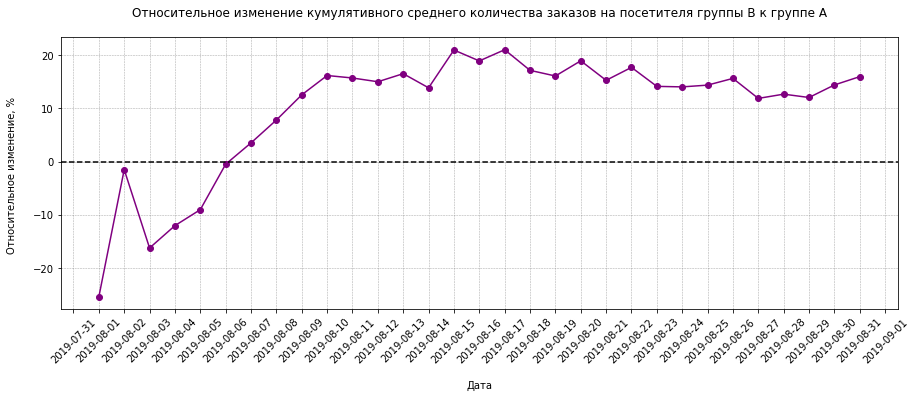

In [23]:


# Создание датафрейма с кумулятивными данными по группам и датам
dates_groups = orders[['date','group']].drop_duplicates()
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                                .agg({'date':'max', 'group':'max', 'transaction_id':pd.Series.nunique, 'visitor_id':pd.Series.nunique, 'revenue':'sum'}), axis=1)\
                                .sort_values(by=['date','group'])
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1)\
                                .sort_values(by=['date','group'])
cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

# Рассчет среднего количества заказов на посетителя для каждой группы и даты
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_B = cumulative_data[cumulative_data['group'] == 'B']
mean_conversion_A = cumulative_data_A.pivot_table(index='date', values='conversion', aggfunc='mean')
mean_conversion_B = cumulative_data_B.pivot_table(index='date', values='conversion', aggfunc='mean')

# Рассчет относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A на каждую дату
merged_conversion = mean_conversion_A.merge(mean_conversion_B, left_index=True, right_index=True, suffixes=('_A', '_B'))
merged_conversion['relative_difference'] = (merged_conversion['conversion_B'] / merged_conversion['conversion_A'] - 1) * 100

plt.figure(figsize=(15, 5))

# Строим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
plt.plot(merged_conversion.index, merged_conversion['relative_difference'], color='purple', linestyle='-', marker='o')

# Настраиваем ось X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=45)

plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A\n  ')
plt.xlabel('\nДата')
plt.ylabel('Относительное изменение, % \n')

plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.show()


B- колличество заказов больше, но количество дней теста небольшое.


**6.  Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.**

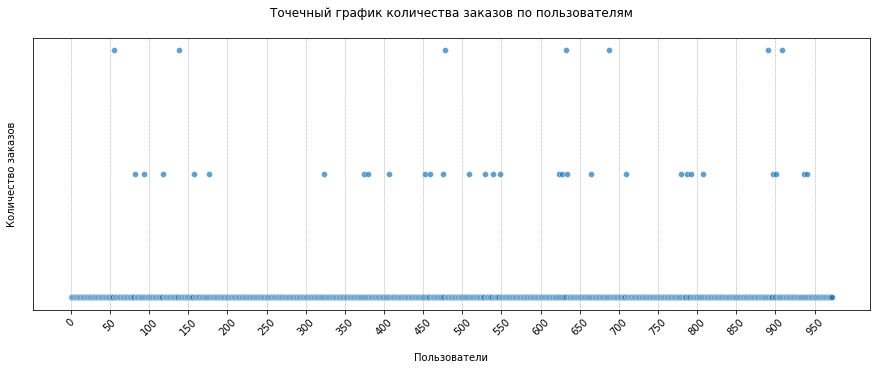

In [24]:


# Агрегирование данных о количестве заказов по пользователям
orders_by_users = (orders.groupby('visitor_id', as_index=False)
                          .agg({'transaction_id': 'nunique'})
                          .rename(columns={'transaction_id': 'orders'}))

orders_by_users.head()

# Создание точечного графика количества заказов по пользователям
plt.figure(figsize=(15,5))
sns.scatterplot(x=range(len(orders_by_users)), y=orders_by_users['orders'], alpha=0.7)

plt.title('Точечный график количества заказов по пользователям\n')
plt.xlabel('\nПользователи')
plt.ylabel('Количество заказов\n')

plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xticks(ticks=np.arange(0, len(orders_by_users), 50), rotation=45)
plt.yticks(ticks=np.arange(0, (orders_by_users['orders'].max()//5 + 1) * 5, 5))

plt.show()


Больше всего пользователей совершивших 1 заказ.
Совершивших 2 заказа значительно меньше. Совершивших 3 заказа единицы, возможно они будут являться выбросами, стоит посчитать выборочные перцентили.

**7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.**

In [25]:
orders_by_users = orders.groupby('visitor_id').agg({'transaction_id': pd.Series.nunique}).reset_index()
orders_by_users.columns = ['visitor_id', 'orders']
print(np.percentile(orders_by_users['orders'], [95, 99]))


[1. 2.]


95% пользователей овершают не больше 1 заказа, 99% совершают 2 заказа, аномальным будет всё, что и более этого.

**8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.**

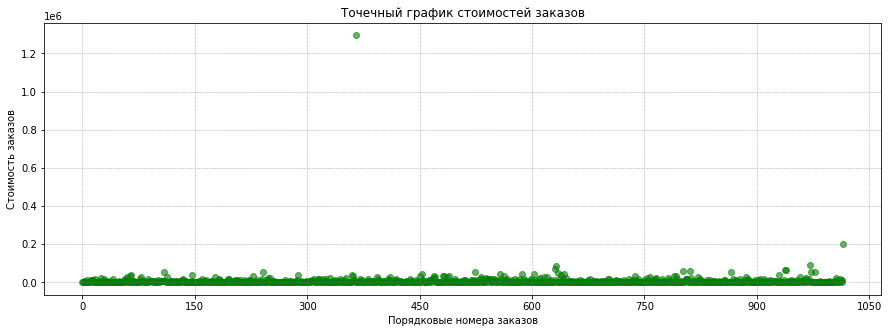

In [26]:

# Создадим переменную для порядковых номеров заказов
order_values = range(len(orders))

# График стоимостей заказов
plt.figure(figsize=(15, 5))
plt.scatter(order_values, orders['revenue'], alpha=0.6, color='green', marker='o')

# Настраиваем оси, заголовок, подписи
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xlabel("Порядковые номера заказов")
plt.ylabel("Стоимость заказов")
plt.title("Точечный график стоимостей заказов")
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)

plt.show()


График не понятный из за выброса данных
Посмотрим поближе, для это уберем очевидные выбросы с revenue

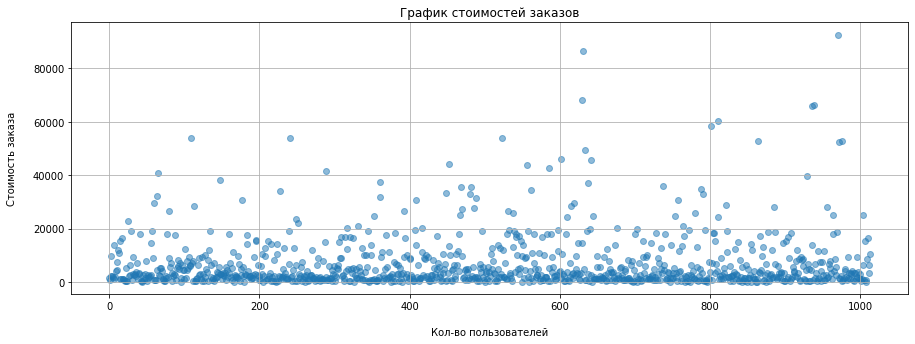

In [27]:
orders['revenue'].sort_values().tail(10)
norm_orders = orders[orders['revenue']<=200000]['revenue']
xn_values = pd.Series(range(0,len(norm_orders)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('\nКол-во пользователей')
plt.ylabel('Стоимость заказа\n')
plt.scatter(xn_values, norm_orders, alpha=0.5);

Большая часть всех заказов не дороже 20000

**9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.**

95-й перцентиль стоимости заказов: 26785.0
99-й перцентиль стоимости заказов: 53904.0


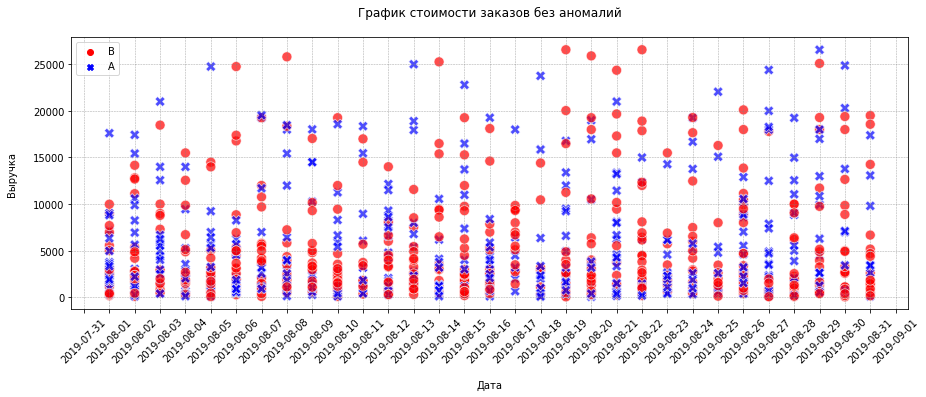

In [28]:

# Считаем 95-й и 99-й перцентили
orders_95_percentile = np.percentile(orders['revenue'], 95)
orders_99_percentile = np.percentile(orders['revenue'], 99)

print('95-й перцентиль стоимости заказов:', orders_95_percentile)
print('99-й перцентиль стоимости заказов:', orders_99_percentile)


# Выберите границу для определения аномальных заказов (к примеру, 95-й перцентиль)
threshold = orders_95_percentile

# Отфильтруем аномальные заказы
orders_filtered = orders[orders['revenue'] < threshold]

# Создадим график
plt.figure(figsize=(15, 5))
sns.scatterplot(data=orders_filtered, x='date', y='revenue', hue='group', style='group', s=100,
                palette={'A': 'blue', 'B': 'red'}, alpha=0.7)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.xticks(rotation=45)

plt.title('График стоимости заказов без аномалий\n')
plt.xlabel('\nДата')
plt.ylabel('Выручка\n')

plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='upper left')

plt.show()


Не более чем у 95% заказов чек выше 26785 рублей, и не более чем у 1% дороже 53904 рублей.
За границу для определения аномальных заказов примем значение 53904.

**10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.**

In [29]:
# Оставим данные без очистки (сырыми)
conversion_raw = (orders.groupby('group').agg({'transaction_id':'count'}).rename(columns={'transaction_id':'orders'}))\
                                                .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()

# Воспользуемся Z-критерием для разности двух долей.
# H0: Конверсия в группе A РАВНА конверсии в группе B
# H1: Конверсия в группе A НЕ РАВНА конверсии в группе B
alpha = 0.05
purchases_raw = np.array(conversion_raw['orders'])
leads_raw = np.array(conversion_raw['visitors'])
p1_raw = purchases_raw[0] / leads_raw[0]
p2_raw = purchases_raw[1] / leads_raw[1]
combined_raw = (purchases_raw[0] + purchases_raw[1]) / (leads_raw[0] + leads_raw[1])
difference_raw = p1_raw - p2_raw
z_value_raw = difference_raw / math.sqrt(combined_raw * (1 - combined_raw) * (1 / leads_raw[0] + 1 / leads_raw[1]))
distr_raw = st.norm(0, 1)
p_value_raw = (1 - distr_raw.cdf(abs(z_value_raw))) * 2

print('p-значение (сырые данные): ', p_value_raw)
if (p_value_raw < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение (сырые данные):  0.016851380434703023
Отвергаем нулевую гипотезу


статическая значимость есть

**11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.**

In [30]:
alpha = 0.05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
pvalue = results.pvalue
print('p-значение: ', pvalue)

# Вычисление относительных различий между группами
revenue_a = orders[orders['group']=='A']['revenue']
revenue_b = orders[orders['group']=='B']['revenue']
median_diff = np.median(revenue_b) / np.median(revenue_a) - 1
mean_diff = revenue_b.mean() / revenue_a.mean() - 1

if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
    print(f"Относительное различие между медианами групп: {median_diff:.2%}")
    print(f"Относительное различие между средними групп: {mean_diff:.2%}")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")


p-значение:  0.8294908998149533
Не получилось отвергнуть H0: вывод о различии сделать нельзя


**12.  Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.**

гипотезы
- H0: Среднее количество заказов в группе A РАВНО среднему количеству заказов в группе B
- H1: Среднее количество заказов в группе A НЕ РАВНО среднему количеству заказов в группе B

In [31]:
orders.head()


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [32]:
orders_per_user = orders.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})\
                         .rename(columns={'transaction_id':'orders'})

outlaws_1p = orders_per_user[orders_per_user['orders'] >= 4]['visitor_id'].to_list()


In [33]:
# Зачистим данные
orders_temp = orders[~orders['visitor_id'].isin(outlaws_1p)]

# Подсчитываем среднее количество заказов на посетителя для каждой группы
orders_mean_clear = orders_temp.groupby(['group', 'visitor_id']).agg({'transaction_id': 'count'}).reset_index()
mean_orders_by_group = orders_mean_clear.groupby('group').agg({'transaction_id':'mean'}).values.flatten()

# Воспользуемся t-критерием Стьюдента для проверки различий между двумя группами
# H0: Среднее количество заказов в группе A РАВНО среднему количеству заказов в группе B
# H1: Среднее количество заказов в группе A НЕ РАВНО среднему количеству заказов в группе B
result = st.ttest_ind(orders_mean_clear[orders_mean_clear['group']=='A']['transaction_id'],
                      orders_mean_clear[orders_mean_clear['group']=='B']['transaction_id'],
                      equal_var=False)

p_value = result.pvalue
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение:  0.3775373897229706
Не получилось отвергнуть нулевую гипотезу


нет статистически значимых различий между средним количеством заказов на посетителя в группе A и группе B.

**13.  Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения**

In [34]:
orders_clear = orders.query('revenue <= 58000')


In [35]:
# Воспользуемся критерием Манна-Уитни

alpha = 0.05
results = st.mannwhitneyu(orders_clear[orders_clear['group']=='A']['revenue'], orders_clear[orders_clear['group']=='B']['revenue'])
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  0.9006884356560738
Не получилось отвергнуть H0: вывод о различии сделать нельзя


In [36]:
orders_clear[orders_clear['group']=='A']['revenue'].mean()


6504.548596112311

In [37]:
orders_clear[orders_clear['group']=='B']['revenue'].mean()


6298.827205882353

средний чек в группе B немного ниже 


P-value = 0.9, значительно больше 0.05. это значит, что в среднем чеке нет различий

**14. Примите решение по результатам теста и объясните его**

 Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

основываясь на результатах А/В тестов принимает решение о прекращении тестов
и зафексировать победу группы В

В группе А немного выше средний чек (+3.27%)
А в группе В выше показатель заказов на одного посетителя (+15%)